## Day 39 Assignment

### Question 1:
1. Do the market basket analysis with Bread_Basket dataset.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style

import seaborn as sns
style.use('fivethirtyeight')

%matplotlib inline

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df= pd.read_csv('datasets/BreadBasket.csv')

In [3]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [4]:
df.shape

(21293, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [6]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [7]:
df.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [8]:
#number of unique features
df.nunique()

Date            159
Time           8240
Transaction    9531
Item             95
dtype: int64

### Data Pre-processing

In [9]:
#check there is any 0 or negative transaction in the dataset
df[df['Transaction']<=0]

,Date,Time,Transaction,Item


In [10]:
#unique items 
df['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [11]:
# NONE Item in dataset
df[df['Item']=='NONE']

,Date,Time,Transaction,Item
26,2016-10-30,10:27:21,11,NONE
38,2016-10-30,10:34:36,15,NONE
39,2016-10-30,10:34:36,15,NONE
66,2016-10-30,11:05:30,29,NONE
80,2016-10-30,11:37:10,37,NONE
...,...,...,...,...
21108,2017-04-08,11:54:22,9590,NONE
21122,2017-04-08,12:58:25,9599,NONE
21254,2017-04-09,12:01:07,9666,NONE
21255,2017-04-09,12:04:13,9667,NONE


In [12]:
# counting number of NONE columns 
df[df['Item']=='NONE'].count()

Date           786
Time           786
Transaction    786
Item           786
dtype: int64

In [13]:
# droping the NONE items of the dataset
df.drop(df[df['Item']=='NONE'].index,inplace=True)

In [14]:
df.shape

(20507, 4)

In [15]:
# couting NONE item of dataset
df[df['Item']=='NONE'].count()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

### Feature Engineering

In [16]:
# add column with an year, month and hour of each transaction:
df['Date']=pd.to_datetime(df['Date'])
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month

In [17]:
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.hour

In [18]:
df.head()

,Date,Time,Transaction,Item,Year,Month,Hour
0,2016-10-30,2020-10-30 09:58:11,1,Bread,2016,10,9
1,2016-10-30,2020-10-30 10:05:34,2,Scandinavian,2016,10,10
2,2016-10-30,2020-10-30 10:05:34,2,Scandinavian,2016,10,10
3,2016-10-30,2020-10-30 10:07:57,3,Hot chocolate,2016,10,10
4,2016-10-30,2020-10-30 10:07:57,3,Jam,2016,10,10


In [19]:
# highest sold item of dataset
highest_sold_item=df['Item'].value_counts().head(15)
highest_sold_item

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Juice             369
Alfajores         369
Soup              342
Name: Item, dtype: int64

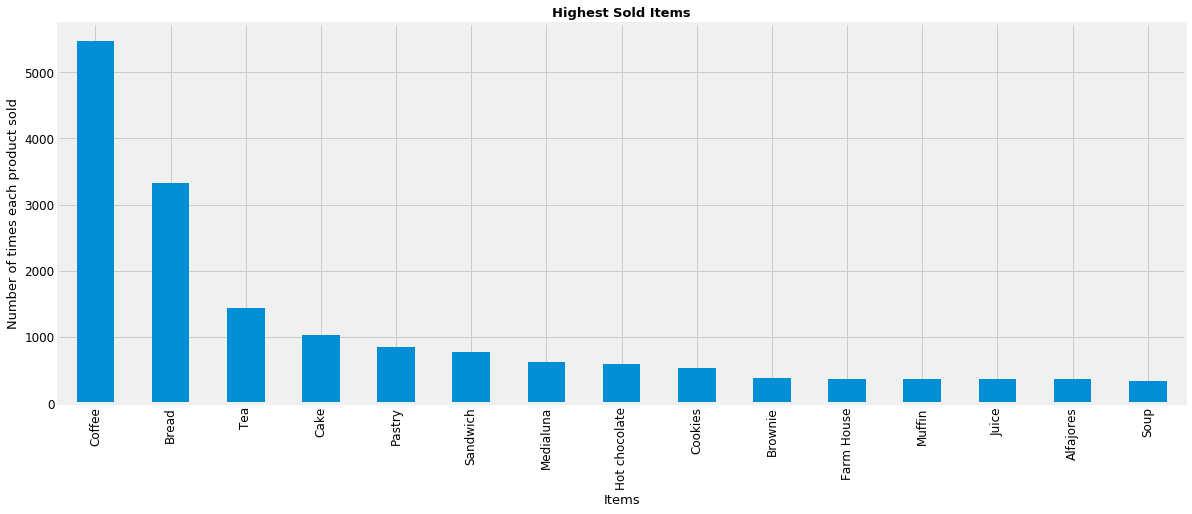

In [20]:
plt.xlabel("Items",fontsize=13)
plt.ylabel("Number of times each product sold",fontsize=13)
plt.title("Highest Sold Items",fontsize=13,fontweight="bold")
highest_sold_item.plot(kind='bar',fontsize=12,figsize=(18,7))

#### Here, Coffee is the most sold item, followed by bread, tea, cake, and pastry, respectively. 

In [21]:
df.groupby(['Month'])['Transaction'].nunique().sort_values(ascending=False)

Month
11    2140
3     1764
12    1672
2     1630
1     1575
4      509
10     175
Name: Transaction, dtype: int64

In [22]:
import calendar
df['Month_name']=df['Month'].apply(lambda x: calendar.month_name[x])

Text(0.5, 1.0, 'Monthly sales')

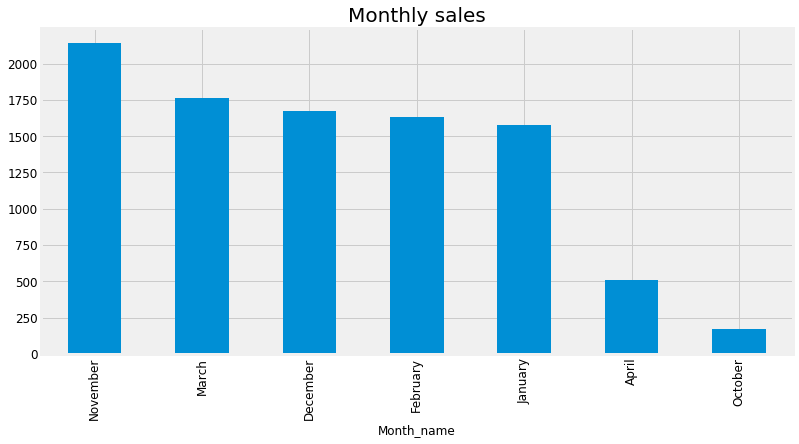

In [23]:
# monthly sales of items
df.groupby(['Month_name'])['Transaction'].nunique().sort_values(ascending=False).plot(kind='bar',fontsize=12,figsize=(12,6))
plt.title("Monthly sales",fontsize=20)

#### Here, In **November** month, the highest sales was made. However, In **april and october** months made least sales.  

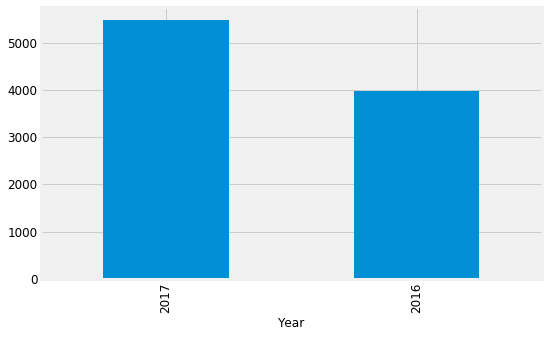

In [24]:
# yearly sales of items
df.groupby(['Year'])['Transaction'].nunique().sort_values(ascending=False)[:20].plot(kind='bar',fontsize=12,figsize=(8,5))

#### Here, 2017 sales is increased compare to previous year(2016) sales.  

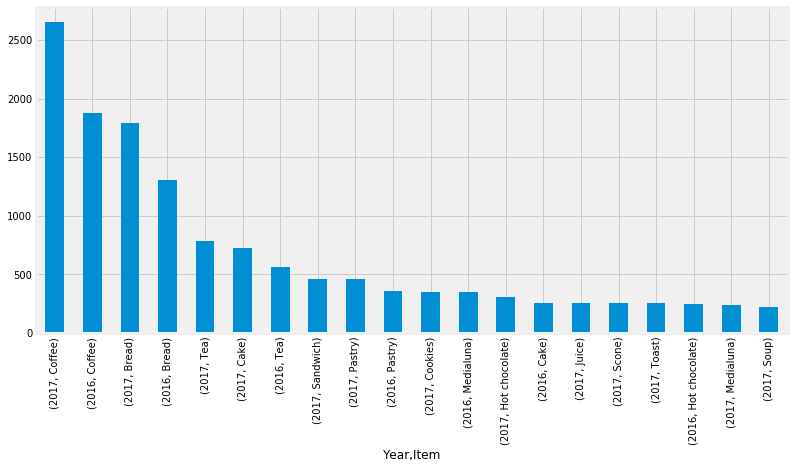

In [25]:
# yearly unique highest Items sold
df.groupby(['Year','Item'])['Transaction'].nunique().sort_values(ascending=False)[:20].plot(kind='bar',figsize=(12,6))

In [26]:
df.head(10)

,Date,Time,Transaction,Item,Year,Month,Hour,Month_name
0,2016-10-30,2020-10-30 09:58:11,1,Bread,2016,10,9,October
1,2016-10-30,2020-10-30 10:05:34,2,Scandinavian,2016,10,10,October
2,2016-10-30,2020-10-30 10:05:34,2,Scandinavian,2016,10,10,October
3,2016-10-30,2020-10-30 10:07:57,3,Hot chocolate,2016,10,10,October
4,2016-10-30,2020-10-30 10:07:57,3,Jam,2016,10,10,October
5,2016-10-30,2020-10-30 10:07:57,3,Cookies,2016,10,10,October
6,2016-10-30,2020-10-30 10:08:41,4,Muffin,2016,10,10,October
7,2016-10-30,2020-10-30 10:13:03,5,Coffee,2016,10,10,October
8,2016-10-30,2020-10-30 10:13:03,5,Pastry,2016,10,10,October
9,2016-10-30,2020-10-30 10:13:03,5,Bread,2016,10,10,October


### Market Basket Analysis

In [28]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [29]:
df[df['Transaction']==5]['Item'].tolist()

['Coffee', 'Pastry', 'Bread']

In [30]:
# list of unique transaction in dataset
tran_list= []
for i in df['Transaction'].unique():
    t_lst = list(set(df[df['Transaction']==i]['Item']))
    if len(t_lst)>0:
        tran_list.append(t_lst)
tran_list        

[['Bread'],
 ['Scandinavian'],
 ['Hot chocolate', 'Cookies', 'Jam'],
 ['Muffin'],
 ['Bread', 'Coffee', 'Pastry'],
 ['Medialuna', 'Muffin', 'Pastry'],
 ['Coffee', 'Medialuna', 'Pastry', 'Tea'],
 ['Bread', 'Pastry'],
 ['Bread', 'Muffin'],
 ['Medialuna', 'Scandinavian'],
 ['Bread', 'Medialuna'],
 ['Tartine', 'Coffee', 'Jam', 'Pastry', 'Tea'],
 ['Bread', 'Coffee', 'Basket'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Scandinavian', 'Mineral water'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Bread', 'Farm House'],
 ['Bread', 'Medialuna'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Bread', 'Coffee'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Scandinavian', 'Muffin'],
 ['Bread', 'Tea'],
 ['Bread', 'Coffee'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Tartine', 'Juice', 'Coffee', 'Muffin'],
 ['Scandinavia

In [32]:
te = TransactionEncoder()

In [35]:
te_array=te.fit(tran_list).transform(tran_list)

In [36]:
basket_model = pd.DataFrame(te_array, columns=te.columns_)

In [42]:
basket_model.head(5)

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
popular_sets= apriori(basket_model,min_support=0.01,use_colnames=True)

In [50]:
popular_sets

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Bread, Coffee, Cake)"
59,0.011199,"(Bread, Coffee, Pastry)"


In [54]:
rules= association_rules(popular_sets,metric='lift',min_threshold=1)

In [55]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


In [69]:
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
23,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


In [70]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.05) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
5,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
10,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
11,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372


## Conclusions